In [16]:
import re
import subprocess
import time
import matplotlib.pyplot as plt

def run_stress_ng(method, n):
    command = f"stress-ng --cache 5 --{method} {n} --timeout 10s --metrics-brief"
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()
    if error:
        return parse_stress_ng_output(error.decode())

    return parse_stress_ng_output(output.decode())

def parse_stress_ng_output(output):
    print(output)
    pattern = re.compile(f'cache\s+(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')
    match = pattern.search(output)

    print(match)

    if match:
        bogo_ops_value = float(match.group(1))
        return bogo_ops_value
    
    return None

def bogo_ops_graph(method, max_n):
    worker_nums = []
    bogo_ops = []

    for n in range(1, max_n+ 1):
        bogo_ops_value = run_stress_ng(method, n)

        if bogo_ops_value is not None:
            worker_nums.append(n)
            bogo_ops.append(bogo_ops_value)

        time.sleep(5)

    plt.plot(worker_nums, bogo_ops, marker='o')
    plt.xlabel('N')
    plt.ylabel('Bogo Ops')
    plt.title(f'Bogo Ops vs l1 chache sets')
    plt.grid(True)
    plt.show()

stress-ng: info:  [8266] setting to a 10 second run per stressor
stress-ng: info:  [8266] dispatching hogs: 5 cache
stress-ng: info:  [8266] successful run completed in 10.00s
stress-ng: info:  [8266] stressor       bogo ops real time  usr time  sys time   bogo ops/s     bogo ops/s
stress-ng: info:  [8266]                           (secs)    (secs)    (secs)   (real time) (usr+sys time)
stress-ng: info:  [8266] cache               290     10.00     23.84      0.27        29.00          12.03

<re.Match object; span=(415, 496), match='cache               290     10.00     23.84      >
stress-ng: info:  [8273] setting to a 10 second run per stressor
stress-ng: info:  [8273] dispatching hogs: 5 cache
stress-ng: info:  [8273] successful run completed in 10.01s
stress-ng: info:  [8273] stressor       bogo ops real time  usr time  sys time   bogo ops/s     bogo ops/s
stress-ng: info:  [8273]                           (secs)    (secs)    (secs)   (real time) (usr+sys time)
stress-ng: info:  [

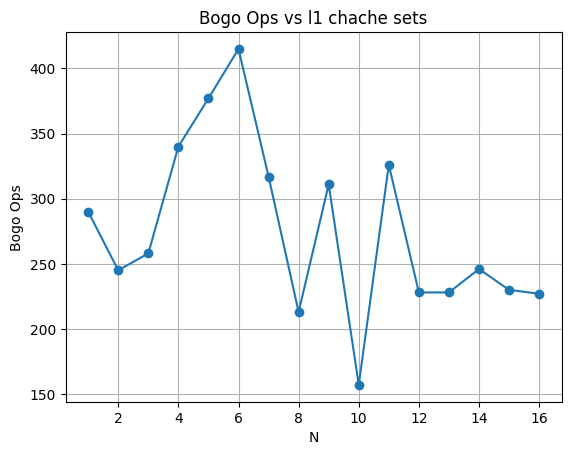

In [17]:
bogo_ops_graph("l1cache-sets", 16)